## Project 2: Wrangling and Analyzing Data


## Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assess">Assessing</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#store">Storage</a></li>
<li><a href="#analyze and visualize">Analysis and Visualization</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

This notebook documents efforts undertaken to gather, assess, clean and provide insights and visualizations to the WeRateDogs twitter archives. The datasets were sourced in three (3) different formats from twitter, a csv file, a txt file and a json file. The csv file (twitter-archive-enhanced; df_twitter) contains tweet_id as the first column which displays unique id numbers for each tweet, in_reply_to_status_id which is supposed to contain ids of tweets being replied to, the in_reply_to_user_id column for the author of the tweet being replied to, the timestamp column containing date and time of tweet, source column showing where the tweet was scraped from, text column displaying the tweet's texts, the retweeted_status_id showing IDs of retweets, the retweeted_status_user_id containing the retweet author's ID, the retweeted_status_timestamp for the date and time the retweet was made, expanded_urls column containing full versions of urls contained in tweets, the rating_numerator which displays the number above in the score fraction, the rating_denominator, displaying the number below in the score fraction, the name column containing the name of the dog if available, the doggo, floofer, pupper and puppo columns showing what category the dog is in. 

The txt file (image-predictions; df_image) was passed through a neural network. It consists the jpg_url column showing URLs of images that belong to the tweets, the img_num column showing the number of images posted, the p1, p2 and p3 columns are three stages showing predictions of the type of content in the image, the p1_conf, p2_conf and p3_conf also display the confidence rate in percentage of the predictions, and the p1_dog, p2_dog and p3_dog contain whether this predictions are true or false. Lastly, the json file (json.txt; df_json) contains a tweet_id column, a retweet_count showing the numbers of retweets and a favorite_count column showing the number of times the tweet was liked.

<a id='gathering'></a>
### DATA GATHERING

All the needed libraries were first of all, imported and then data was gathered programmatically for all three files as seen below.

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the twitter-archive-enhanced.csv

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

The twitter-archive-enhanced was read in using the normal pandas read function and named df_twitter as seen above while the image predictions file was downloaded and saved in using the requests library before it was then read in with specified delimiters.

### Downloading the image-predictions.tsv

In [3]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)
    
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')

### Querying additional data and reading in the json file line by line

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

The json.txt file was provided by udacity instructor as there were certain issues sourcing it via the twitter API (tweepy). It was however, read in line by line using the json loads function and only the required columns were gathered.

In [4]:
df_json = []
with open('tweet_json.txt') as file:
    for line in file:
        j = json.loads(line) 
        tweet_id = j['id']
        retweet_count = j['retweet_count']
        favorite_count = j['favorite_count']
        df_json.append({'tweet_id':tweet_id,
                     'retweet_count':retweet_count,
                     'favorite_count':favorite_count
                          })
df_json = pd.DataFrame(df_json, columns=['tweet_id','retweet_count', 'favorite_count'])

<a id='assess'></a>
### ASSESSING

#### Visual assessment
Now that the files have been gathered, assessing begins. Visual and programmatic assessment is used as will be seen below. The first three cells below show visual assessment.

In [5]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ronduh. She's a Finnish Checkered Blitzkr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256...,10,10,Ronduh,None,None,None,None
2036,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm just going to leave this one here as well....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906...,13,10,None,None,None,None,None
329,833479644947025920,NaN,NaN,2017-02-20 00:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Poppy. She just arrived. 13/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833479644...,13,10,Poppy,None,None,None,None
1122,730573383004487680,NaN,NaN,2016-05-12 01:40:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rooney. He can't comprehend glass. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730573383...,10,10,Rooney,None,None,pupper,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None


In [7]:
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [8]:
df_json.sample(10)

,tweet_id,retweet_count,favorite_count
1186,718454725339934721,1685,5320
2333,666287406224695296,71,152
87,875097192612077568,6342,27997
303,836380477523124226,3337,16037
1236,712097430750289920,1172,4144
2076,670832455012716544,242,780
2290,667160273090932737,66,268
2034,671729906628341761,4795,9119
44,883482846933004288,10407,46860
1466,694206574471057408,2297,4582


In [9]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
df_image.sample(10)                                            

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1458,777885040357281792,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True
825,693262851218264065,https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg,1,golden_retriever,0.989333,True,Labrador_retriever,0.007946,True,kuvasz,0.000749,True
567,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.031128,True,Brittany_spaniel,0.005512,True
713,685325112850124800,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1173,737310737551491075,https://pbs.twimg.com/ext_tw_video_thumb/73731...,1,cliff,0.439077,False,lakeside,0.062899,False,valley,0.039758,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True


#### Programmatic assessment
This is where programmatic assessment begins. It begins with the df_twitter dataset and as will be seen below, It was assessed more rigorously as it holds more content than other datasets.

In [11]:
df_twitter.shape

(2356, 17)

In [12]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The .shape and .info above were run to know the number of columns and rows and, to know the datatypes and number of null values in each column. On the other hand, .duplicated revealed that there were no duplicates in the dataset which was fascinating and .isnull was used to search for null values in one of the major columns

In [13]:
sum(df_twitter.duplicated())

0

In [14]:
df_twitter[df_twitter['source'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The source column was probed a little more to reveal that 91 tweets sourced from vine as seen above. This was further showcased below as the vine URL variable was called. This was done so as to observe the texts that followed it.

In [16]:
df_twitter.loc[lambda df_twitter: df_twitter['source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
1834,676121918416756736,NaN,NaN,2015-12-13 19:30:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a very excited dog. Cle...,NaN,NaN,NaN,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,None,None,None
1916,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is life-changing. 12/10 https://t.co/SroT...,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,12,10,life,None,None,None,None


In [17]:
df_twitter.text.value_counts().sample(6)

This is Jeffrey. He's being held so he doesn't fly away. 12/10 would set free https://t.co/d3aLyCykn7                                           1
This is Herald. He likes to swing. Subtle tongue slip. Owner good at b-ball. Creepy person on bench back there. 9/10 https://t.co/rcrKkL7eB6    1
THE BRITISH ARE COMING\nTHE BRITISH ARE COMING\n10/10 https://t.co/frGWV7IP6J                                                                   1
This is Penny. She's an OU cheerleader. About to do a triple back handspring down the stairs. 11/10 hype af https://t.co/B2f3XkGU5c             1
This is Frönq. He got caught stealing a waffle. Damn it Frönq. 9/10 https://t.co/7ycWCUrjmZ                                                     1
This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm                                             1
Name: text, dtype: int64

Another major column was then assessed singly to reveal tweet URLs at the end of the the descriptive text that would otherwise not have been seen. It was also noted that some tweets carried RT @name indicating retweets among the tweets.

In [18]:
df_image.shape

(2075, 12)

In [19]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The image dataset was then assessed using .shape to find the column and row number, .info to show the datatypes and number of columns with null values. Here the tweet id was seen to appear again. Below, .unique was used to show the number of unique values in p1 column.

In [20]:
df_image['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [21]:
df_image[df_image['p1'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Null values were also checked for in the p1 column and value counts were used on the images url column to show the number of times a picture appeared and .duplicated also carried out on the image dataset. This also showed that there were no duplicates.

In [22]:
df_image.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [23]:
sum(df_image.duplicated())

0

In [24]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


The json dataset is the has the smallest contents so it is the last to be assessed. The . info was used to see the datatypes and the .shape gives the rows and columns. There were also no duplicates in this dataset.

In [25]:
df_json.shape

(2354, 3)

In [26]:
sum(df_json.duplicated())

0

### Assessment result
#### Tidiness issues
1) Id column in the df_twitter table is duplicated in the df_image and df_json tables

2) The dog levels are in four columns 

3) Headers are not descriptive enough.

#### Quality issues
1) Some columns have little or no value such as 'in_reply_to_user_id', in_reply_to_status_id', 'retweeted_status_id', 'retweeted_user_id', retweeted_status_timestamp'.

2) The datatype of the timestamp column is object.

3) The date and time are combined in the datetime column.

4) The name column has some inaccurate names such as the, not, a.

5) Some tweets are sourced from vine instead of twitter.

6) The (href=) tag reduces the aesthetics of urls in source column.

7) There are urls at the end of the description in text column.

8) P1, P2 and P3 columns have both upper case and lower case letters.

9) Some numerators are not valid

<a id='clean'></a>
### CLEANING

#### Tidiness issues
1) Drop the tweet_id column in the df_image and df_json tables.  

2) Melt the different dog levels into one column.

3) Change current less descriptive headers to be more descriptive.

#### Quality issues
1) Drop columns with little or no value such as 'in_reply_to_user_id', in_reply_to_status_id', 'retweeted_status_id', 'retweeted_user_id', retweeted_status_timestamp'.

2) Convert the datatype of the timestamp column from object to datetime.

3) Extract the time from the date in timestamp column.

4) Impute accurate names if available for values such as (the, not, a).

5) Drop tweets that are sourced from vine.

6) Remove the href tag before the urls in source column.

7) Extract the urls at the end of descriptive text into another column.

8) Change the P1, P2 and P3 columns to lower case. 

9) Extract numerator patterns from text and place in a column alongside numerator and denominator fractions.

#### TIDINESS ISSUES

The tidiness issues were cleaned first. In this section, tests for code functionality were carried out as soon as cleaning was done. The first issue was the duplicate columns between tables. 

In [27]:
#Tidiness Issue 1: Drop the tweet_id column in the df_image and df_json tables
# Find the duplicate columns in the datasets
all_columns = pd.Series(list(df_twitter) + list(df_json) + list(df_image))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

In [28]:
# drop tweet id column in df_image dataset
df_image = df_image.drop(['tweet_id'], axis = 1)
# test
df_image

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...
2070,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [29]:
# drop tweet id column in df_json dataset
df_json = df_json.drop(['tweet_id'], axis = 1)
# test
df_json

,retweet_count,favorite_count
0,8853,39467
1,6514,33819
2,4328,25461
3,8964,42908
4,9774,41048
...,...,...
2349,41,111
2350,147,311
2351,47,128
2352,48,132


The second tidiness issue involves melting the different dog levels (doggo, pupper, floofer and puppo) into one column which will be named dog_levels. After this, the duplicates were all dropped.

In [30]:
df_twitter=pd.melt(df_twitter, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
                   value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                   var_name = 'dog_levels')

#test
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   timestamp                   9424 non-null   object 
 2   source                      9424 non-null   object 
 3   text                        9424 non-null   object 
 4   expanded_urls               9188 non-null   object 
 5   rating_numerator            9424 non-null   int64  
 6   rating_denominator          9424 non-null   int64  
 7   name                        9424 non-null   object 
 8   in_reply_to_status_id       312 non-null    float64
 9   in_reply_to_user_id         312 non-null    float64
 10  retweeted_status_id         724 non-null    float64
 11  retweeted_status_user_id    724 non-null    float64
 12  retweeted_status_timestamp  724 non-null    object 
 13  dog_levels                  9424 

In [31]:
df_twitter.drop_duplicates('tweet_id', inplace=True)
df_twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_levels,value
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN,doggo,None


One prerequisite for the project was to merge all datasets into a master dataset. The tweet id column was not needed to be dropped in the df_twitter dataset as it was needed to appear at least once. All the datasets were concatenated below into one comprehensive dataset as seen below.

In [32]:
frames = df_twitter, df_image, df_json
master_df = pd.concat(frames, axis = 1)
# test
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   expanded_urls               2297 non-null   object 
 5   rating_numerator            2356 non-null   int64  
 6   rating_denominator          2356 non-null   int64  
 7   name                        2356 non-null   object 
 8   in_reply_to_status_id       78 non-null     float64
 9   in_reply_to_user_id         78 non-null     float64
 10  retweeted_status_id         181 non-null    float64
 11  retweeted_status_user_id    181 non-null    float64
 12  retweeted_status_timestamp  181 non-null    object 
 13  dog_levels                  2356 

In [33]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   expanded_urls               2297 non-null   object 
 5   rating_numerator            2356 non-null   int64  
 6   rating_denominator          2356 non-null   int64  
 7   name                        2356 non-null   object 
 8   in_reply_to_status_id       78 non-null     float64
 9   in_reply_to_user_id         78 non-null     float64
 10  retweeted_status_id         181 non-null    float64
 11  retweeted_status_user_id    181 non-null    float64
 12  retweeted_status_timestamp  181 non-null    object 
 13  dog_levels                  2356 

The info function was used to see that all the columns were properly joined in the master dataset. Then a copy of the dataset was made in order to save the original for future references. This is seen below.

In [34]:
# making a copy of the master dataset
master_dataset = master_df.copy()

The third tidiness issue was to replace the less descriptive column headers with more descriptive column headers. It was performed on the dataset copy named 'master_dataset'. This was done using the rename function on the columns.  This was tested for below and the changes were seen.

In [35]:
# Tidiness issue 3: Changing less descriptive columns headers to be more descriptive
master_dataset = master_dataset.rename(columns = {
    'timestamp':'tweet_timestamp',
    'source':'tweet_source',
    'jpg_url':'image_url',
    'img_num':'image_num',
    'p1':'prediction1',
    'p1_conf':'confidence_rate1',
    'p1_dog':'p1_confirmation',
    'p2':'prediction2',
    'p2_conf':'confidence_rate2',
    'p2_dog':'p2_confirmation',
    'p3':'prediction3',
    'p3_conf':'confidence_rate3',
    'p3_dog':'p3_confirmation'
    })
# test
master_dataset.head()

,tweet_id,tweet_timestamp,tweet_source,text,expanded_urls,rating_numerator,rating_denominator,name,in_reply_to_status_id,in_reply_to_user_id,...,confidence_rate1,p1_confirmation,prediction2,confidence_rate2,p2_confirmation,prediction3,confidence_rate3,p3_confirmation,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,9774.0,41048.0


#### QUALITY ISSUES

Quality issues were tackled here. A second prerequisite for this project was to drop the retweets and work with only the tweets. This was carried out below before any of the quality issues were cleaned and then, it was tested for immediately after.

In [36]:
retweets = master_dataset[master_dataset['retweeted_status_id'].notna()]
master_dataset = master_dataset.drop(retweets.index)
#test
master_dataset[master_dataset['retweeted_status_id'].notna()]

,tweet_id,tweet_timestamp,tweet_source,text,expanded_urls,rating_numerator,rating_denominator,name,in_reply_to_status_id,in_reply_to_user_id,...,confidence_rate1,p1_confirmation,prediction2,confidence_rate2,p2_confirmation,prediction3,confidence_rate3,p3_confirmation,retweet_count,favorite_count


In [37]:
retweet = master_dataset[master_dataset['in_reply_to_status_id'].notna()]
master_dataset = master_dataset.drop(retweet.index)
#test
master_dataset[master_dataset['in_reply_to_status_id'].notna()]

,tweet_id,tweet_timestamp,tweet_source,text,expanded_urls,rating_numerator,rating_denominator,name,in_reply_to_status_id,in_reply_to_user_id,...,confidence_rate1,p1_confirmation,prediction2,confidence_rate2,p2_confirmation,prediction3,confidence_rate3,p3_confirmation,retweet_count,favorite_count


The retweets were dropped by the index to clear the entire row. This was then tested for by checking the number of values that were notna in the 'in_reply_to_status_id' and 'retweeted_status_id' columns. 

In [38]:
# Quality issue 1: Dropping columns with little to no value
master_dataset.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'value'], axis=1, inplace=True)
# test 
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   tweet_timestamp     2097 non-null   object 
 2   tweet_source        2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   dog_levels          2097 non-null   object 
 9   image_url           1822 non-null   object 
 10  image_num           1822 non-null   float64
 11  prediction1         1822 non-null   object 
 12  confidence_rate1    1822 non-null   float64
 13  p1_confirmation     1822 non-null   object 
 14  prediction2         1822 non-null   object 
 15  confidence_rate2    1822 non-null   float64
 16  p2_con

The first quality issue involved dropping columns that were deemed unnecessary or of no use. This was carried out as seen above using the drop function. Next, the datatype of the timestamp column was to be converted to datetime. pd.to_dateime was used and the info function was used to test for that this worked.

In [39]:
# Quality issue 2: Convert datatype of timestamp column to datetime
master_dataset['tweet_timestamp'] = pd.to_datetime(master_dataset['tweet_timestamp'])
#test
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   tweet_timestamp     2097 non-null   datetime64[ns, UTC]
 2   tweet_source        2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_levels          2097 non-null   object             
 9   image_url           1822 non-null   object             
 10  image_num           1822 non-null   float64            
 11  prediction1         1822 non-null   object             
 12  confidence_rate1    1822 non-null 

In [40]:
# Quality issue 3: Extracting the time from the date
master_dataset['tweet_timestamp'] = pd.DatetimeIndex(master_dataset['tweet_timestamp']).date
#test
master_dataset['tweet_timestamp'] 

0       2017-08-01
1       2017-08-01
2       2017-07-31
3       2017-07-30
4       2017-07-29
           ...    
2351    2015-11-16
2352    2015-11-16
2353    2015-11-15
2354    2015-11-15
2355    2015-11-15
Name: tweet_timestamp, Length: 2097, dtype: object

The third quality issue involved extracting the time from the date in the timestamp column. This was successful with the use of pd.DatetimeIndex. Below, innacurate names were tackled. The inaccurate names such as not, a, the, in the name column were loced with the text column to see if these names were available in the text column. The names that were available in the text column were then changed one by one programmatically by specifying the row and column and the name to be changed to.

In [41]:
# Quality issue 4: Impute accurate names if available for values such as the, not, a.
# Checking the text with 'the' for names
master_dataset.loc[lambda master_dataset: master_dataset['name'] == 'the']['text'].unique()

array(['Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx',
       "This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn",
       "This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb",
       "This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF",
       "This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU",
       'Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3',
       'This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK',
       "Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol

Rows of the name column containing inaccurate names 'the', 'not' and 'a' were loced with text column and names were manually searched for in the text column

In [42]:
# Checking the text with 'not' for names
master_dataset.loc[lambda master_dataset: master_dataset['name'] == 'not']['text'].unique

<bound method Series.unique of 335    There's going to be a dog terminal at JFK Airp...
988    What jokester sent in a pic without a dog in i...
Name: text, dtype: object>

In [43]:
# Checking the text with 'a' for names
master_dataset[master_dataset['name'] == 'a']['text'].unique

<bound method Series.unique of 56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really 

In [44]:
# change name 'a' where name is available
master_dataset.loc[1853, 'name']='Wylie'
master_dataset.loc[1955, 'name']='Kip'
master_dataset.loc[2034, 'name']='Jacob'
master_dataset.loc[2066, 'name']='Rufus'
master_dataset.loc[2116, 'name']='Spork'
master_dataset.loc[2125, 'name']='Cherokee'
master_dataset.loc[2128, 'name']='Hemry'
master_dataset.loc[2146, 'name']='Alphred'
master_dataset.loc[2161, 'name']='Alfredo'
master_dataset.loc[2191, 'name']='Leroi'
master_dataset.loc[2218, 'name']='Chuk'
master_dataset.loc[2235, 'name']='Alfonso'
master_dataset.loc[2249, 'name']='Cheryl'
master_dataset.loc[2255, 'name']='Jessiga'
master_dataset.loc[2264, 'name']='Klint'
master_dataset.loc[2273, 'name']='Kohl'
master_dataset.loc[2287, 'name']='Daryl'
master_dataset.loc[2304, 'name']='Pepe'
master_dataset.loc[2311, 'name']='Octaviath'
master_dataset.loc[2314, 'name']='Johm'
#test
master_dataset.query('name == "Wylie"')

,tweet_id,tweet_timestamp,tweet_source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_levels,image_url,...,confidence_rate1,p1_confirmation,prediction2,confidence_rate2,p2_confirmation,prediction3,confidence_rate3,p3_confirmation,retweet_count,favorite_count
1853,675706639471788032,2015-12-12,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,https://twitter.com/dog_rates/status/675706639...,10,10,Wylie,doggo,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,...,0.841768,False,rule,0.007087,False,envelope,0.00682,False,428.0,1276.0


Above, All the names obtained from text column were put into the name column one by one. As the test, the index, the first dog name changed, was queried.

In [45]:
# Quality issue 5: Drop tweets sourced from vine
vine = master_dataset[master_dataset['tweet_source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']
master_dataset = master_dataset.drop(vine.index)
#test
master_dataset[master_dataset['tweet_source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']

,tweet_id,tweet_timestamp,tweet_source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_levels,image_url,...,confidence_rate1,p1_confirmation,prediction2,confidence_rate2,p2_confirmation,prediction3,confidence_rate3,p3_confirmation,retweet_count,favorite_count


Quality issue 5 involved dropping the rows with tweets sourced from vines. These were queried and then dropped by the index to remove the entire row. This code was then tested and shown that it worked. In the quality issue 6 below, the href tag that came before the urls in tweet_source was sliced off and tested for.

In [46]:
# Quality issue 6: Remove the href tag before the urls in source column.
master_dataset.tweet_source = master_dataset.tweet_source.str[9:].str.pad(3, fillchar = ' ')
#test
master_dataset.tweet_source.value_counts()

http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: tweet_source, dtype: int64

In [47]:
# Quality issue 7: Extract the urls from the text in text column
master_dataset["tweet_url"] = master_dataset["text"].str.rsplit(' ').str.get(-1)
master_dataset["tweet_url"]

0       https://t.co/MgUWQ76dJU
1       https://t.co/0Xxu71qeIV
2       https://t.co/wUnZnhtVJB
3       https://t.co/tD36da7qLQ
4       https://t.co/AtUZn91f7f
                 ...           
2351    https://t.co/4B7cOc1EDq
2352    https://t.co/DWnyCjf2mx
2353    https://t.co/y671yMhoiR
2354    https://t.co/r7mOb2m0UI
2355    https://t.co/BLDqew2Ijj
Name: tweet_url, Length: 2006, dtype: object

The tweet urls in the text column which were somewhat hidden were extracted and placed in another column named tweet_urls. This was to make them more easily accessible by future users if needed. Below, head function was used to test to see if the column was created. 

In [48]:
#issue 7 test
master_dataset.head(2)

,tweet_id,tweet_timestamp,tweet_source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_levels,image_url,...,p1_confirmation,prediction2,confidence_rate2,p2_confirmation,prediction3,confidence_rate3,p3_confirmation,retweet_count,favorite_count,tweet_url
0,892420643555336193,2017-08-01,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8853.0,39467.0,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,6514.0,33819.0,https://t.co/0Xxu71qeIV


In [49]:
# Quality issue 8: Change the P1, P2 and P3 columns to lower case.
#P1
master_dataset["prediction1"] = master_dataset["prediction1"].str.lower()
#test
master_dataset["prediction1"].str.islower()

0       True
1       True
2       True
3       True
4       True
        ... 
2351     NaN
2352     NaN
2353     NaN
2354     NaN
2355     NaN
Name: prediction1, Length: 2006, dtype: object

This quality issue involved changing the uppercase values in the prediction columns to lower case for consistency. It was carried out column by column using the str.lower function on the columns.

In [50]:
# P2
master_dataset["prediction2"] = master_dataset["prediction2"].str.lower()
#test
master_dataset["prediction2"].str.islower()

0       True
1       True
2       True
3       True
4       True
        ... 
2351     NaN
2352     NaN
2353     NaN
2354     NaN
2355     NaN
Name: prediction2, Length: 2006, dtype: object

In [51]:
#P3
master_dataset["prediction3"] = master_dataset["prediction3"].str.lower()
#test
master_dataset["prediction3"].str.islower()

0       True
1       True
2       True
3       True
4       True
        ... 
2351     NaN
2352     NaN
2353     NaN
2354     NaN
2355     NaN
Name: prediction3, Length: 2006, dtype: object

The last quality issue which involved fixing invalid numerators was carried out using regex to filter out the ratings from the text column and then assigning it in a seperate column called rate_pattern. A rate fraction column which is a merging of the numerator and denominator columns was also created to display the fraction as it is without seperation. However, the seperate columns of numerator and denominator were not dropped for the sake of future analysis.

In [52]:
# Quality issue 8: Fix invalid numerators
reg = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

def rating_pattern(rate):
  try:
      return re.findall(reg, rate)[0][0]
  except Exception as e:
      return ''


master_dataset['rate_pattern'] = master_dataset['text'].apply(rating_pattern)
master_dataset['rate_fraction'] = master_dataset['rating_numerator'].astype(str) + '/' + master_dataset['rating_denominator'].astype(str)
master_dataset[master_dataset['rate_pattern'] != master_dataset['rate_fraction']][['rate_pattern', 'rate_fraction']]

,rate_pattern,rate_fraction
45,13.5/10,5/10
695,9.75/10,75/10
763,11.27/10,27/10
1712,11.26/10,26/10


<a id='store'></a>
### STORING

The dataset was then saved to twitter-archive-master as required for the project using to_csv.

In [53]:
master_dataset.to_csv('twitter_archive_master.csv', index=False)

<a id='analyze and visualize'></a>
### ANALYSIS AND VISUALISATIONS

For the analysis, the following questions were posed to decipher the WeRateDogs twitter account milestones. 

#### Insights
1) The most liked tweet

2) Are retweets numbers dependent on number of favorites?

3) How much has the weratedogs twitter account grown over the years

In [54]:
master_dataset.head()

,tweet_id,tweet_timestamp,tweet_source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_levels,image_url,...,confidence_rate2,p2_confirmation,prediction3,confidence_rate3,p3_confirmation,retweet_count,favorite_count,tweet_url,rate_pattern,rate_fraction
0,892420643555336193,2017-08-01,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,0.156665,True,shetland_sheepdog,0.061428,True,8853.0,39467.0,https://t.co/MgUWQ76dJU,13/10,13/10
1,892177421306343426,2017-08-01,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.074192,True,rhodesian_ridgeback,0.072010,True,6514.0,33819.0,https://t.co/0Xxu71qeIV,13/10,13/10
2,891815181378084864,2017-07-31,"http://twitter.com/download/iphone"" rel=""nofol...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.138584,True,bloodhound,0.116197,True,4328.0,25461.0,https://t.co/wUnZnhtVJB,12/10,12/10
3,891689557279858688,2017-07-30,"http://twitter.com/download/iphone"" rel=""nofol...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.360687,True,miniature_pinscher,0.222752,True,8964.0,42908.0,https://t.co/tD36da7qLQ,13/10,13/10
4,891327558926688256,2017-07-29,"http://twitter.com/download/iphone"" rel=""nofol...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.243682,True,doberman,0.154629,True,9774.0,41048.0,https://t.co/AtUZn91f7f,12/10,12/10


#### Analysis 1: The most liked tweet
The first analysis was to find the most liked tweet. This was chosen in order to dicsover a model of what the fans and followers of the account loved or were quick to favorite. Before this was carried out, a copy of the dataset was made as one of the insights would require change of the some variables in the dataset and so that the saved dataset will remain intact. The favorite count with the most number was discovered and then queried to find the row which was done below. It showed the text of the most favorited tweet and made us understand why it was most favorite.

In [55]:
# First, find the tweet with the highest number of likes
m_df= master_dataset.copy()
m_df['favorite_count'].max()

132810.0

In [56]:
# Query the dataset to find it
favorite_tweet = m_df.query('favorite_count == 132810.0')
favorite_tweet

,tweet_id,tweet_timestamp,tweet_source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_levels,image_url,...,confidence_rate2,p2_confirmation,prediction3,confidence_rate3,p3_confirmation,retweet_count,favorite_count,tweet_url,rate_pattern,rate_fraction
412,822975315408461824,2017-01-22,"http://twitter.com/download/iphone"" rel=""nofol...",This is Albus. He's soaked as h*ck. Seems to h...,https://twitter.com/dog_rates/status/822975315...,12,10,Albus,doggo,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,...,0.115984,True,miniature_pinscher,0.052175,True,48265.0,132810.0,https://t.co/yUM8jYStuG,12/10,12/10


This showed that the most favorite tweet was posted on the 22nd of January, 2017. It revealed albus who was supposedly soaked as h*ck. Possibly, the dog's adorability, the time of the year it was posted and just ended and about to begin festive seasons, influenced the popularity of this tweet and captured a lot of hearts.

#### Analysis 2: Are retweets numbers dependent on number of favorites?
The highest number of retweets and favorites led to this second insight which made me long to know if the retweets are influenced by the number of favorites and vice versa. This would show if retweets were the reason for the posts' success or if it was favorites number. A sample of six of the most recent tweets were used for this analysis, plotting retweet count against favourite count in a bar chart to see the relationship. This is the first insight.

In [67]:
# The dataframe
df_retweets = master_dataset.loc[:,["retweet_count", "favorite_count"]]
df_retweets

,retweet_count,favorite_count
0,8853.0,39467.0
1,6514.0,33819.0
2,4328.0,25461.0
3,8964.0,42908.0
4,9774.0,41048.0
...,...,...
2351,47.0,128.0
2352,48.0,132.0
2353,532.0,2535.0
2354,NaN,NaN


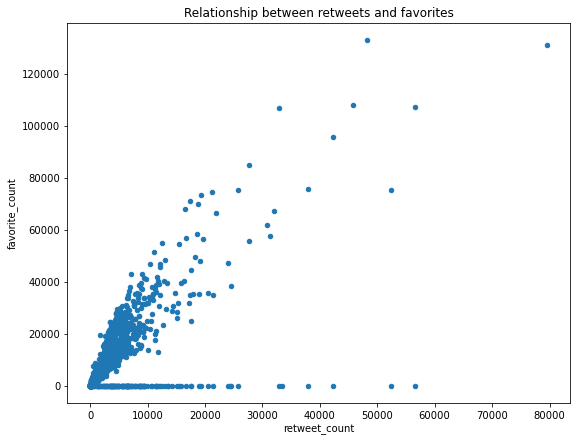

In [69]:
df_retweets.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter', figsize= (9, 7))
plt.title('Relationship between retweets and favorites'); 

After plotting this, a somewhat positive correlation between retweets and favorites was discovered. This suggests co-dependence of the two variables. It is seen in the however, that a greater percentage of tweets performed averagely and only a handful had massive success. This proves how much consistency works even when massive results are not coming in.

#### Analysis 3: How much has the weratedogs twitter account grown over the years
This insight was selected to discover how much the WeRateDogs account has been doing over the years. It was carried out by converting the timestamp to year only and then plotting by the mean of the favorite count per year. This would show how many likes (favorites) they were getting every year and how the likes were either increasing or decreasing.

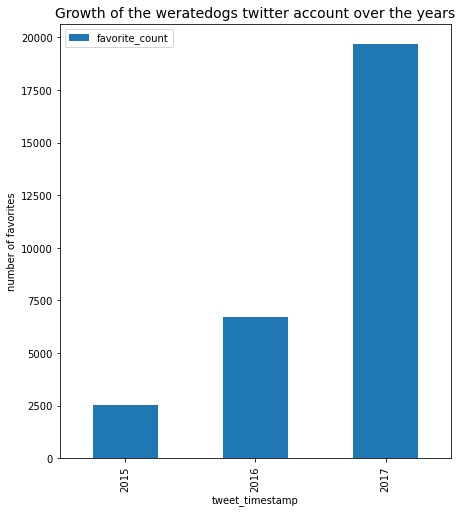

In [59]:
m_df['tweet_timestamp'] = pd.DatetimeIndex(m_df['tweet_timestamp']).year
m_df['tweet_timestamp']

most_liked = m_df.groupby(['tweet_timestamp'], as_index=False)['favorite_count'].mean()
most_liked.plot(x= 'tweet_timestamp', y='favorite_count', kind='bar', figsize = (7,8))
plt.ylabel('number of favorites')
plt.title('Growth of the weratedogs twitter account over the years', fontsize=14);

This insight and visualization showed that the account has been steadily rising over the years. It exposed their small beginning and how they have steadily grown higher in favorites which may also influence growth in number of followers/ fans, the number of people who get to see the account's post on their feed, the number of new users the account may be recommended to or the number of people who get to see the account on their explore/for you page.

<a id='conclusion'></a>
### Conclusions and Limitations

### Conclusions
Gathering, assessing, cleaning and analysis has been carried out on data which was sourced from twitter archives to get WeRateDogs tweets over the years. This was to render the data clean and fit for analysis and eventually to perform analysis/ discover insights on the data. The data was successfully gathered, assessed visually and programmatically, cleaned and stored. Insights considered were the most liked tweet, if the retweets numbers were dependent on number of favorites and how much has the weratedogs twitter account grown over the years. 
After careful analysis, it was discovered that due to the accounts consistency, they have grown steadily every year since the beginning. Their most successful year according to the data analysed was the year 2017. The success could be attributed to their most successful tweet being in the same year and it can be concluded that if they continue consistently, the account would eventually become one of the most followed and liked accounts and their tweets, one of the most retweeted on twitter.

### Limitations
The limitations of this dataset include the presence of inaccurate data and the subsequent inability to source directly form the twitter's API due to certain issues. Another limitation was knowledge constraint on the part of the analyst. However, this limitation is constantly being remedied.